# Data Science: Analysis, Visualization, and Machine Learning with Python

## by Troy Nguyen

This notebook showcases the Data Science skills that I've enhanced with the help of IBM's Cognitive Classes, from which I earned badges in: [Applied Data Science with Python](https://www.youracclaim.com/badges/7921c193-b25b-4395-bdf4-caaef5164e80/linked_in_profile), and [Machine Learning with Python]().  
The workflow processes and examples in this notebook are accurate to the style that I implement in a professional setting.

# Table of Contents

- [Data Analysis](#Data-Analysis:-The-Price-of-Cars)
    - [Data Import](#Data-Import)
    - [Data Wrangling](#Data-Wrangling)
        - [Invalid Missing Values](#Convert-Invalid-Missing-Values)
        - [Replacing and Dropping Missing Values](#Replacing-and-Dropping-Missing-Values)
        - [Correcting Data Types](#Correcting-Data-Types)
        - [Data Standardization](#Data-Standardization)
        - [Data Normalization](#Data-Normalization)
        - [Data Binning](#test)
        - [Dummy Variables](#Dummy-Variables)
    - [Exploratory Data Analysis](#test)
    - [Model Development](#test)
    - [Model Evaluation](#test)
    
    
- [Data Visualization](#test)
    - [Sub-heading](#test)
    
    
- [Machine Learning](#test)
    - [Sub-heading](#test)

# Data Analysis: The Price of Cars

Using Data Analysis, we can figure out the max price a car can be realistically sold for.  
We will be using a public dataset named **"1985 Auto Imports Database"**, provided by Jeffrey C. Schlimmer.  
The dataset can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/autos, as filename: **"import-85.data"**.

Below is a sample of the dataset viewed in a text editor:

![test_title1](Picture_of_Cars_Dataset.png)

We can see that this dataset is structured in CSV format, comma-separated values.  
Each row represents a new observation, while each comma separates one column (or variable) from the next.

There is also another helpful file in the open directory named **"import-85.names"**, which contains further details about the dataset.  
IBM Cognitive Class was kind enough to compile the column header info into a more digestable format as can be seen here:

![test_title2](Picture_of_Cars_Names.png)

The 2 columns that the **"import-85.names"** file brings special attention to (besides the very important **price** column in No. 26), are No. 1 and 2: **symboling** and **normalized-losses**.

**Symboling:** 
**The degree to which the auto is more risky than its price indicates.**   
Cars are initially assigned a risk factor symbol associated with its price.
Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  
Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

**Normalized-losses:**
**The relative average loss payment per insured vehicle year.**   
This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Key points we've seen so far is:  

1. Our data is in **CSV format** 
2. Our dataset **does not have headers/column names**, but the supporting **"import-85.names"** file does
3. Our dataset contains questions marks: **"?"** which stands for **missing values** (as informed in the names file), we will deal with these in a later section

Now that we have a basic understanding of our data, we are ready to import our data.

# Data Import

We will import the data using the **Pandas Library**, which offers data structure and tools for effective data manipulation and analysis.  
We will do this in 5 steps:
1. Import the **Pandas Library**
2. Create a **filepath variable** to hold our data source location
3. Use the **pandas.read_csv method** to import our data in a dataframe
4. Create a list that holds the column headers (since the actual dataset lacks headers)
5. Join the headers to the dataset

In [1]:
import pandas as pd

filepath='imports-85.data'
df=pd.read_csv(filepath, header=None) # header=None specifies that there is no header in the dataset

In [2]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df.columns=headers

After importing a dataset, it's good practice to print a sample to make sure nothing went wrong.  
In most cases, using the **pandas.dataframe.head() method** to show the first n rows is a sufficient check.  
Let's check the first few rows:

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We have successfully imported our data with the proper headers, and can move on to wrangling our data.

# Data Wrangling

Before we can do actual analysis on our data, we have to make sure that our data is properly wrangled, or pre-processed.  
For example, the dataset could have missing values, incorrect data types, misformatted data, and so forth.  
Let's start with handling missing values.

### Convert Invalid Missing Values

Our dataset has "invalid" missing values in the form of question marks, **"?"**.  
We want to replace **"?"** with **NaN (Not a Number)**, which is Python's default missing value marker for reasons of computational speed and convenience.  
We can use the **pandas.dataframe.replace method** and **numpy.nan constant** to achieve this.

In [5]:
import numpy as np

df.replace("?", np.nan, inplace = True) 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now that we have the missing values in a compatible format, we can look at how many we have and where.  
Let's use the built-in Python function **isnull()**, combined with a **for loop** to count missing values per column.

In [6]:
missing_data = df.isnull()                          # create a dataframe of the missing values

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")                                       # adds an extra line between variables for easier reading

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

We can see that there are 7 columns with missing data:  

1. "normalized-losses": 41 missing values
2. "num-of-doors": 2 missing values
3. "bore": 4 missing values
4. "stroke" : 4 missing values
5. "horsepower": 2 missing values
6. "peak-rpm": 2 missing values
7. "price": 4 missing values

**Note**: (The **"import-85.names"** file actually provides to us the missing values info that we just calculated.  
However, we are not always lucky to have that info and must know how to find the missing values ourselves.  
In addition, even if you are given a nice file like such, you still want to check your findings compared to the document.)

Now that we know what we're up against, let's take a look at how to deal with the missing values.

### Replacing and Dropping Missing Values

There are many ways to deal with missing values, which include:

1. Replace the missing data with the average or most common value of the variable
2. Remove the whole row with the missing value (if the column is our main focus or if not many observations are missing values)
3. Remove the whole column with the missing value (only if most entries in the column are empty)

We will perform all methods above except for 3: "Remove whole column", since we do not have a column with a large amount of values missing (the biggest being 41 out of 205 rows for "normalized-losses")

### Dealing with Missing Values - Replacing Missing Continuous Values

If we want to replace missing values in our **"normalized-losses"** column (with the average), we first calculate what the average is.  
Once we have the average stored in a variable, we can replace every missing value with it.  
Let's perform this method to all continuous variables that need fixing (with the exception of price, as that is our dependent variable that we will drop rows for later).

In [7]:
#normalized losses
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)  # calculate column as float to avoid possible data type errors
print("Average of normalized-losses:", avg_norm_loss)                 # show the average that we will use to replace
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)  # replace missing values with the average

Average of normalized-losses: 122.0


In [8]:
#bore
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.3297512437810957


In [9]:
#stroke
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

Average of stroke: 3.2554228855721337


In [10]:
#horsepower
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

Average of horsepower: 104.25615763546799


In [11]:
#peak-rpm
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm:", avg_peak_rpm)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

Average of peak-rpm: 5125.369458128079


### Dealing with Missing Values - Replacing Missing Categorical Values

Replacing missing categorical values is very similar to replacing continuous ones, with the main difference being we use the most commonly occuring value, rather than the calculated 
mean.  
Our only categorical variable to fix is **"num-of-doors"** and we can use the **idxmax method** to calculate the most common value:

In [12]:
mode_doors=df['num-of-doors'].value_counts().idxmax()         # create variable to hold the most common value
print(mode_doors)                                             # print the common value
df["num-of-doors"].replace(np.nan, mode_doors, inplace=True)  # replace the missing values with the most common value

four


### Dealing with Missing Values - Dropping Observations

Since our analysis is focusing on the column **"price"**, we will drop rows that are missing a price value.  
We can use the **pandas.dropna method** to drop rows that contain missing values.  

In [13]:
df.dropna(subset=["price"], axis=0, inplace=True)  # axis=0 specifies rows, inplace=True modifies the dataset
df.reset_index(drop=True, inplace=True)            # we reset the index since we dropped rows of data
df.head()                                          # reprint the dataset to check what we have done

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correcting Data Types

Pandas automatically assigns data types based on the encoding it detects from the original data table.  
For a number of reasons, this assignment may not always be correct and could cause problems.  
For example: if you wanted to perform a math function (like sum or divide) on a column like **"horsepower"** but it was accidently assigned as an **object** instead of **integer or float**, then it would not be possible.  
We can apply the **dtype** method to return the data type of each column and see if something is not as we expected.

In [14]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we read down the output, most of the data types make sense, however some do not.  
These include: **"normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", and "price"**, as these are **continuous** variables assigned as **objects**.  

Let's go ahead and use the **dataframe.astype() method** to convert the datatypes.

In [15]:
df["normalized-losses"]=df["normalized-losses"].astype("int64")
df["bore"]=df["bore"].astype("float")                            # converted to float since we noticed decimal values
df["stroke"]=df["stroke"].astype("float")                        # converted to float since we noticed decimal values
df["horsepower"]=df["horsepower"].astype("int64")
df["peak-rpm"]=df["peak-rpm"].astype("int64")
df["price"]=df["price"].astype("int64")

In [16]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Data Standardization

Standardization is the process of transforming data into a different and/or common format.  
Though we are lucky that our data is in **mpg (miles per gallon) format**, sometimes we may not be so lucky and need to convert formats to fit the business needs.  
For instance if we were doing this analysis in a country that uses the **L/100km standard**, we will have to do some extra work.  
Let's create new columns for city-mpg and highway-mpg, named **city-L/100km** and **highway-L/100km**.

The formula for this unit conversion is: **L/100km = 235 / mpg**

In [17]:
df['city-L/100km'] = 235/df["city-mpg"]        # create a new column off a transformation of an existing one
df['highway-L/100km'] = 235/df["highway-mpg"]  # do the same for highway-mpg
df.head()                                      # check the new dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818


### Data Normalization

Data Normalization is the process of transforming variable ranges to be more consistent/closer together.  
Large differences in variable ranges (such as Age range: 1-100 and Income range: 1-500000), can create large intrinsic differences in impact.  
(Example: Even if income has the same or less true impact than age, the model will naturally say that income has more impact as it changes.)  
We can avoid this by using Data Normalization, specifically **Simple Feature Scaling: normalizing the ranges to be from 0 to 1**.  
We can do this by dividing original values by their maximum value.

In [18]:
# Normalize length, width, and height
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

### Data Binning (or rather not?)

One technique that was taught in the courses was Data Binning, that is the process of grouping continuous variable values into smaller bins.  
So instead of treating something like "age" as a regular continuous value that ranges from 1-100 with many different unique values, you could group the ages into categorical sets such as 1-33 (young), 34-66 (average), and 67-100 (old). However as of this moment I do not see many good reasons to perform data binning, as it can often reduce analysis strength. One article that perfectly puts into words some arguments against data binning, is "Why binning continuous data is almost always a mistake" by Peter Flom, which can be found [here](https://medium.com/@peterflom/why-binning-continuous-data-is-almost-always-a-mistake-ad0b3a1d141f).

To summarize:

1. Data Binning creates the illusion that **"something huge happens at the cutoff"**, like my example above: a 1 year old and 33 year old are similar but a 33 year old and 34 year old are very different
2. Data Binning increases type I (false positive) and type II (false negative) error
3. Data Binning (though rare) can be good for situations where treatment is truly dichotomous and/or there is a really large gap (legal vs illegal drinkers, legal drinking age cutoff)

I would still love to return to this topic in the future and gain a better understanding of its strengths and weaknesses, but at the moment have no desire to use this technique for my data science.

### Dummy Variables

We can assign numbers to Categorical Variable values so that they can be used in Regression Analysis later on (most statistical models require numbers as input).  
This is easiest and most effective for variables that have at most 2 unique values (but more works as well), such as these from our dataset:  
* fuel-type: gas, diesel.
* aspiration: std, turbo.
* num-of-doors: four, two.
* engine-location: front, rear.

However for demonstration and time's sake, I will only be creating dummy variables for fuel-type.  
We can use the **pandas.getdummies method** to assign numerical values to "gas" and "diesel".

In [19]:
dummy_fuel_df = pd.get_dummies(df["fuel-type"])
dummy_fuel_df.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
# Rename the dummy variables for clarity
dummy_fuel_df.rename(columns={'diesel':'diesel-flag','gas':'gas-flag'}, inplace=True)
dummy_fuel_df.head()

,diesel-flag,gas-flag
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
# Concatenate the main dataset with the fuel-type dataframe we just made
df = pd.concat([df, dummy_fuel_df], axis=1)

# Drop original "fuel-type" column from main dataset
df.drop("fuel-type", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel-flag,gas-flag
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000,21,27,13495,11.190476,8.703704,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000,21,27,16500,11.190476,8.703704,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000,19,26,16500,12.368421,9.038462,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500,24,30,13950,9.791667,7.833333,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500,18,22,17450,13.055556,10.681818,0,1


Section Recap:

Before we can perform Data Analysis, we have to make sure our dataset is properly pre-processed.  
To do this, we: 
* converted invalid missing values to valid missing values
* replaced the proper missing values with either the average or mode of the variable
* dropped observations that didn't have a value for our variable of interest (price)
* corrected data types
* demonstrated data standardization/conversion
* created dummy variables that will help us analyze categorical variables in a numerical way later down the line.  

We will now take our first steps into Data Analysis, specifically Exploratory Data Analysis.

# Exploratory Data Analysis

The main goal of this Exploratory Data Analysis, is to figure out which variables have a good chance of being a good price indicator.  
We can use **Pearson Correlation** to examine the numerical values, **ANOVA** to examine the categorical variables, and some Data Visualization to further help our choices.  

### Pearson Correlation with Regression Plots

Pearson Correlation is 0.5846418222655081 with a P-value of 8.076488270732955e-20


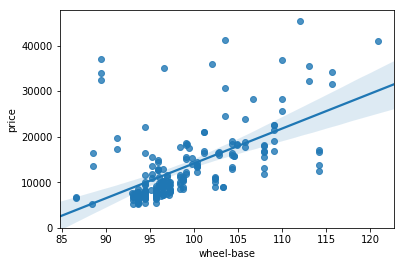

In [22]:
#import modules to plot and run stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

# Wheel Base Regression Plot on Price
sns.regplot(x="wheel-base", y="price", data=df)
plt.ylim(0,)

# Pearson Correlation of Wheel Base on Price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Pearson Correlation is", pearson_coef, "with a P-value of", p_value)

Although the linear relationship of ~0.585 isn't extremely strong, the p-value is less than 0.001, which means the correlation between wheel-base and price is statistically significant.


For the purpose of time and demonstration, I ran the same strategy for the rest of the continuous variables and found these to be the total good numerical indicators of price:

* Wheel-base
* Length
* Width
* Curb-weight
* Engine-size
* Bore
* Horsepower
* City-mpg
* Highway-mpg

### ANOVA with Boxplots (for categorical variables)

ANOVA results: F= 0.35899737117070574 , P = 0.5497450927348373


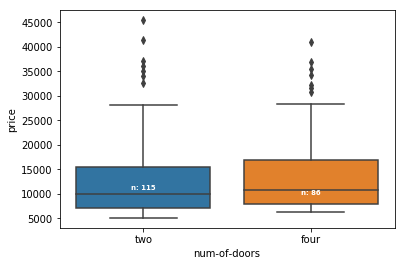

In [23]:
ax=sns.boxplot(x="num-of-doors", y="price", data=df)
# Calculate number of observations per group & median to position the labels
medians = df.groupby(['num-of-doors'])['price'].median().values
nobs = df['num-of-doors'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold')

# group by

df_gptest = df[['num-of-doors','price']]
grouped_test1 = df_gptest.groupby(['num-of-doors'],as_index=False).mean()

grouped_test2=df_gptest[['num-of-doors', 'price']].groupby(['num-of-doors'])
grouped_test2.head(2)
df_gptest

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('four')['price'], grouped_test2.get_group('two')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

The lack of different distribution in the boxplot implies that the variable is not a good indicator, and the ANOVA results of: F value is extremely low and the p value is extremely high, meaning this is not a good indicator of price.

For the purpose of time and demonstration, I ran the same strategy for the rest of the continuous variables and found these to be the total good numerical indicators of price:
    
* ?

# Model Development